# WIGtech
___

In the following project, given data coming from [Notoria](https://serwis.notoria.pl/news/espi-ebi) (website providing financial statement data) I will analyse financial data of companies belonging to WIGtech. WIGtech is an index on [Warsaw Stock Exchange](https://www.gpw.pl/en-home), which was created in 2019. The index includes new technology companies listed on the Main Market from such sectors as: games, IT, biotechnology, telecommunications as well as new technologies. 

The main idea of the project is to find some interesting patterns in data coming from financial statements of WIGtech companies.

The financial statements were imported in Power Query, combined and initially modified. 

A list of all the WIGtech companies and current quotations can be found [here](https://www.money.pl/gielda/indeksy_gpw/wigtech/).

## Dataset Overview

We will begin with reading in the dataset and doing some initial exploration.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in the data for our analysis
wigtech = pd.read_csv('finance_projects\\wigtech_financial_statements_data.csv', encoding='ISO-8859-1', low_memory=False)

# Exploring the dataset
pd.options.display.max_columns = 150 # to avoid truncated output 
wigtech.head()

,Company Name,Okres obrachunkowy,Accounting period,01.18-12.18,01.17-12.17,01.16-12.16,01.15-12.15,01.14-12.14,01.13-12.13,01.12-12.12,01.11-12.11
0,11BIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11BIT,Akcje wÅasne,Own shares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11BIT,Akcje/udziaÅy wÅasne,Treasury shares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11BIT,Aktywa,Aktywa,109262.821,48649.817,45350.347,33895.516,21515.857,8712.6688,7336.53,2986.19
4,11BIT,Aktywa,ASSETS,109262.821,48649.817,45350.347,33895.516,21515.857,8712.6688,7336.53,2986.19


The first column represents the company name. The further two columns are the same, just first is in Polish and the second in English - they both regard to some specific information coming from a financial statement. Accounting period is not the exact name for these columns so we will rename it and also skip the Polish column because it does not provide any additional information. The last eight columns present numerical values for the specific financial information in various accounting periods (for example '01.18-12.18' represents amounts in thousands PLN from January until the end of December 2018). We will modify the column names to improve the understanding of what each column represents an also stylize as camel case.

In [2]:
# Dropping a column with drop function
wigtech = wigtech.drop(['Okres obrachunkowy'], axis=1)

In [3]:
# Renaming columns
to_rename = {'Record ID': 'id', 'Company Name': 'companyName', 'Accounting period': 'financialInformation'}
wigtech = wigtech.rename(to_rename, axis=1)

# Exploring the updated columns
wigtech.columns

Index(['companyName', 'financialInformation', '01.18-12.18', '01.17-12.17',
       '01.16-12.16', '01.15-12.15', '01.14-12.14', '01.13-12.13',
       '01.12-12.12', '01.11-12.11'],
      dtype='object')

In [4]:
# WIGtech comapnies
wigtech['companyName'].value_counts()

TBULL       243
SILVAIR     242
CDPROJEK    242
SYGNITY     242
ELZAB       242
OAT         242
NETIA       242
SYNEKTIK    242
IFIRMA      242
CYFPOLS     242
PGSSOFT     242
ULTGAMES    242
SIMPLE      242
BETACOM     242
ARCUS       242
ATENDE      242
AILLERON    242
CIGAMES     242
SELVITA     242
COMP_W      242
TALEX       242
11BIT       242
PLAY        242
QUANTUM     242
ASSECOBS    242
COMARCH     242
TSGAMES     242
ARTIFEX     242
PLAYWAY     242
LSISOFT     242
NTT         242
ASSECOSE    242
VIVID       242
ASSECOP     242
DATAWALK    242
XTPL        242
PBKM        242
OPTEAM      242
ORANGEPL    242
WASKO       242
R22         241
LIVECHAT    241
Name: companyName, dtype: int64

We can find out that there are 10 columns and over 10,000 rows in our dataset. But what specific financial information can we find in our dataset? Let's check what unique information does the ``financialInformation`` column represent.

In [5]:
wigtech['financialInformation'].value_counts()

Depreciation                                         126
Cost of sales                                         84
Cost of goods and materials sold                      84
Accounting period                                     82
Date of publication                                   43
Interest and dividends from investments               42
Non-current liabilities                               42
Working capital ratio                                 42
Other capitals                                        42
Start of period                                       42
Income tax                                            42
Cash and cash equivalents                             42
Normalized scale of the PoznaÅski model              42
Load operating profit                                 42
Share of profit of associates companies               42
Foreign exchange                                      42
Inventories                                           42
Own shares                     

There are very many positions that we can analyse. There are 42 companies in WIGtech so any higher value indicates that we have duplicates. 

## Net Profit

In this part of the project we would like to see how the net profit changed in WIGtech companies in years 2011-2018.

Net profit is part of [income statement](https://www.investopedia.com/articles/04/022504.asp), which is used in financial reporting to summarize a company's revenues and expenses over some period (in our case annually). Net profit can be also named net income or net earnings and it represents a bottom line of the mentioned income statement, indicating the company's profitability. An important issue regarding this statement is related to an accrual accounting, which is a rule that in the income statement all profits and losses related to the current period have to be reported (even if there was no cash movement). 

In [6]:
wigtech[wigtech['financialInformation'] == 'Net profit/loss']

,companyName,financialInformation,01.18-12.18,01.17-12.17,01.16-12.16,01.15-12.15,01.14-12.14,01.13-12.13,01.12-12.12,01.11-12.11
235,11BIT,Net profit/loss,37549.897,3417.34,11881.245,12755.37,9180.718,1008.36665,1344.44,1292.8
477,AILLERON,Net profit/loss,2793,8297,6579,2005,3020,4007,3081.06,2340.97
719,ARCUS,Net profit/loss,1701,4075,'-3341,3763,'-3958,2298,4011,'-5067
961,ARTIFEX,Net profit/loss,'-12035.65805,'-4517.69383,6081.08948,7829.21567,NaN,NaN,NaN,NaN
1203,ASSECOBS,Net profit/loss,62569,50138,42446,33509,28571,26828,26532,29834
1445,ASSECOP,Net profit/loss,166500,175600,352100,257100,290300,280300,323600,315300
1687,ASSECOSE,Net profit/loss,28501,19831,19,55298,18761,40312,46712,16864
1929,ATENDE,Net profit/loss,10679,7570,7303,8950,5175,10160,1017,5501
2171,BETACOM,Net profit/loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625
2413,CDPROJEK,Net profit/loss,109451,184613,249702,336200,'-12407,18298,23870,20684


We can observe that in the case of loss, there is a single apostrophe and minus preceding the value. We will remove the apostrophes as they are not needed.

In [7]:
# Removing apostrophes
wigtech = wigtech.astype(str).applymap(lambda x: x.replace('\'', ''))

In [8]:
# Finding Net Profit
net_profit = wigtech[wigtech['financialInformation'] == 'Net profit/loss']

As our data regarding the net profit is ready for an analysis, we will start with some simple statistics to understand the trends in our data better.

In [9]:
# Net profit in accounting periods from 2011 till 2018 
net_profit[['01.18-12.18','01.17-12.17','01.16-12.16','01.15-12.15','01.14-12.14','01.13-12.13','01.12-12.12','01.11-12.11']].astype(float).round(5).describe()

,01.18-12.18,01.17-12.17,01.16-12.16,01.15-12.15,01.14-12.14,01.13-12.13,01.12-12.12,01.11-12.11
count,37.000000,38.000000,3.600000e+01,33.000000,30.000000,2.900000e+01,2.800000e+01,3.000000e+01
mean,53413.774861,21291.977589,-1.070692e+04,49289.994501,48292.099496,8.376440e+04,7.436959e+04,9.330344e+04
std,151614.641094,112634.635049,3.219135e+05,108449.893050,124225.037828,2.743133e+05,2.469890e+05,3.584372e+05
min,-23056.000000,-148714.000000,-1.762000e+06,-10441.000000,-19704.000000,-2.124000e+03,-9.417500e+04,-2.863400e+04
25%,-342.000000,-999.657500,-3.833263e+02,1878.241300,900.750000,2.108000e+03,3.826450e+02,5.430000e+02
50%,4141.000000,3843.500000,3.314000e+03,7829.215670,4869.500000,5.944000e+03,2.200000e+03,2.251985e+03
75%,28501.000000,8115.250000,1.269318e+04,26768.000000,17573.354007,2.682800e+04,1.149050e+04,1.704325e+04
max,778413.000000,606000.000000,5.780000e+05,446100.000000,567000.000000,1.428000e+06,1.184000e+06,1.951000e+06


The highest average net profit among WIGtech companies was in 2018. Furthermore, in 2018 25% of net profits are below -342 thousand PLN, 50% are less than 4,141 thousand PLN, 75% net profits are 28,501 thousand PLN. The maximum net profit was 778,413 thousand PLN. From the above table we can notice that the results are much different in each year. For sure we can assess the increasing average net profit positively. 

## Net Cash Flow

As mentioned before, net profit is presented according to accrual accounting. To get a better picture regarding the WIGtech companies financial standing, we will also analyze [net cash flow](https://investinganswers.com/dictionary/n/net-cash-flow#:~:text=Net%20cash%20flow%20refers%20to,on%20its%20cash%20flow%20statement.), which informs about the difference in company's inflows and outflows in a given period.

In [10]:
wigtech[wigtech['financialInformation'] == 'Net cash flow']

,companyName,financialInformation,01.18-12.18,01.17-12.17,01.16-12.16,01.15-12.15,01.14-12.14,01.13-12.13,01.12-12.12,01.11-12.11
125,11BIT,Net cash flow,-3925.651,-937.638,6183.384,15286.595,3903.026,275.06832,2166.5,567.62
367,AILLERON,Net cash flow,-2868,-8188,8491,6035,-2435,430,-80.67,2472.6
609,ARCUS,Net cash flow,-313,692,-3646,-5728,782,-5243,5203,-32312
851,ARTIFEX,Net cash flow,nan,nan,nan,nan,nan,nan,nan,nan
1093,ASSECOBS,Net cash flow,15714,-73284,29797,-16795,2738,6430,31232,5769
1335,ASSECOP,Net cash flow,-43400,288400,-23400,-43400,-21100,-182800,10100,116000
1577,ASSECOSE,Net cash flow,10582,14835,-21720,25041,4939,307,-2302,-8684
1819,ATENDE,Net cash flow,-63725,70627,-38504,39285,-2954,8031,-11942,-1396
2061,BETACOM,Net cash flow,nan,nan,nan,nan,nan,nan,nan,3013
2303,CDPROJEK,Net cash flow,22650,-162049,96334,313275,-7055,7827,10152,-8571


We can notice that the net cash flow is much different in case of WIFtech companies and is changing each year (sometimes differences between two neighbouring years are huge. We will understand more regarding the data using pandas.DataFrame.describe.

In [11]:
# Assignment
net_cash_flow = wigtech[wigtech['financialInformation'] == 'Net cash flow']

In [12]:
# Net cash flow in accounting periods from 2011 till 2018 
net_cash_flow[['01.18-12.18','01.17-12.17','01.16-12.16','01.15-12.15','01.14-12.14','01.13-12.13','01.12-12.12','01.11-12.11']].astype(float).round(5).describe()

,01.18-12.18,01.17-12.17,01.16-12.16,01.15-12.15,01.14-12.14,01.13-12.13,01.12-12.12,01.11-12.11
count,36.000000,37.000000,35.000000,32.000000,30.000000,28.000000,2.800000e+01,30.000000
mean,9633.740653,6188.680867,1714.993783,13034.893175,6777.241788,-11851.275282,-8.274284e+04,7969.422038
std,45406.573604,91418.655749,34468.313167,65958.783354,29147.600007,46378.833449,4.458379e+05,67943.491787
min,-63725.000000,-249000.000000,-65000.000000,-134271.000000,-21100.000000,-182800.000000,-2.356000e+06,-126779.000000
25%,-3043.377500,-5294.510000,-11178.255000,-1906.750000,-2398.673262,-5494.000000,-2.064812e+03,-6777.250000
50%,-766.000000,692.000000,-409.705490,2779.500000,-44.797160,-7.466715,4.350000e+02,65.295000
75%,4797.250000,5394.000000,3327.500000,16376.243852,3611.769500,2329.750000,4.328500e+03,3569.750000
max,228400.000000,345000.000000,142400.000000,313275.000000,147700.000000,27911.000000,4.745300e+04,319000.000000


The average net cash flows in years 2011-2018 for WIGtech comapnies look quite fine. However, in many accounting periods (2018, 2016, 2014, 2013) 50% of net cash flows were negative. 

## WIGtech Industries

In the previous part of the project we noticed that there are big variations regarding the net profit and the net cash flow among WIGtech companies. We will group the companies and provide the analysis for WIGtech industries.

In [13]:
# Writing a function for an industry
def industry(row):
    if (row['companyName'] == 'OAT') or (row['companyName'] == 'PBKM') or (row['companyName'] == 'SELVITA') or (row['companyName'] =='SYNEKTIK'):
        return 'biotechnology'
    if (row['companyName'] == 'CYFPOLS') or (row['companyName'] == 'NETIA') or (row['companyName'] == 'ORANGEPL') or (row['companyName'] == 'PLAY'):
        return 'telecommunication'
    if (row['companyName'] == 'R22') or (row['companyName'] == 'XTPL'):
        return 'new technologies'
    if (row['companyName'] == '11BIT') or (row['companyName'] == 'ARTIFEX') or (row['companyName'] == 'CDPROJEKT') or (row['companyName'] == 'CIGAMES') or (row['companyName'] == 'PLAYWAY') or (row['companyName'] == ' TBULL') or (row['companyName'] == 'TSGAMES') or (row['companyName'] == 'ULTGAMES') or (row['companyName'] == 'VIVID'):
        return 'games'
    else:
        return 'IT'

# Applying the function
wigtech['industry'] = wigtech.apply(industry, axis=1)
print(wigtech['industry'].value_counts(normalize=True))

IT                   0.595297
games                0.166683
telecommunication    0.095247
biotechnology        0.095247
new technologies     0.047525
Name: industry, dtype: float64


As we can see above, the leading WIGtech industry is computer science. The second - games, is already much smaller group of companies. The remaining 10 companies are telecommunication, biotechnology and new technologies. 

## The Average Net Profit by Industry

In [14]:
# Grouping the net profit results by industry
net_profit = wigtech[wigtech['financialInformation'] == 'Net profit/loss']
grouped = net_profit.groupby('industry')
games = grouped.get_group('games')
games_net_profit = games[['01.18-12.18','01.17-12.17','01.16-12.16','01.15-12.15','01.14-12.14','01.13-12.13','01.12-12.12','01.11-12.11']].astype(float).round(2)
games_info = games_net_profit.describe().round(2)
games_info

,01.18-12.18,01.17-12.17,01.16-12.16,01.15-12.15,01.14-12.14,01.13-12.13,01.12-12.12,01.11-12.11
count,7.00,7.00,6.00,5.00,3.00,3.00,3.00,3.00
mean,7709.56,3946.04,683.27,13268.96,3541.12,9469.69,-5738.21,6208.00
std,23358.61,6687.85,9494.51,20591.67,4892.98,14902.65,11490.55,9450.35
min,-21508.00,-4517.69,-14390.00,-7757.00,425.63,723.70,-18996.00,228.20
25%,-8738.97,-408.60,-4179.06,6020.00,721.32,866.04,-9279.53,760.50
50%,2009.00,3417.34,3033.32,7829.22,1017.00,1008.37,436.94,1292.80
75%,26696.98,6890.92,6102.02,12755.37,5098.86,13842.68,890.69,9197.90
max,37549.90,15758.00,11881.24,47497.22,9180.72,26677.00,1344.44,17103.00


WIGtech games companies can be charactarised by a fluctuating average net income in years 2011-2018. However, in years 2017-2018 the net profit increased year by year and that can be seen positively. 25% or less of average net profit was negative. 

In [15]:
# Grouping the net profit results by industry
biotech = grouped.get_group('biotechnology')
biotech_net_profit = biotech[['01.18-12.18','01.17-12.17','01.16-12.16','01.15-12.15','01.14-12.14','01.13-12.13','01.12-12.12','01.11-12.11']].astype(float).round(2)
biotech_info = biotech_net_profit.describe().round(2)
biotech_info

,01.18-12.18,01.17-12.17,01.16-12.16,01.15-12.15,01.14-12.14,01.13-12.13,01.12-12.12,01.11-12.11
count,3.00,4.00,4.00,3.00,3.00,2.00,2.00,2.00
mean,-2462.76,7395.38,4351.75,4786.03,-1550.36,584.05,-2312.00,-1341.90
std,21666.93,12308.31,10584.38,6194.83,17006.11,3829.75,4972.57,2528.22
min,-23056.00,-2484.46,-2482.06,-766.00,-19704.00,-2124.00,-5828.14,-3129.63
25%,-13763.20,726.59,-1738.02,1445.00,-9330.75,-769.98,-4070.07,-2235.77
50%,-4470.40,3394.47,-76.31,3656.00,1042.49,584.05,-2312.00,-1341.90
75%,7833.86,10063.26,6013.45,7562.04,7526.46,1938.07,-553.93,-448.04
max,20138.12,25277.04,20041.67,11468.08,14010.42,3292.09,1204.14,445.82


In 4 accounting periods (out of 8 analysed), the average net profit in biotechnology industry was negative. 50% or less of average net profit in 2018 was below zero (loss).  

In [16]:
# Grouping the net profit results by industry
telecom = grouped.get_group('telecommunication')
telecom_net_profit = telecom[['01.18-12.18','01.17-12.17','01.16-12.16','01.15-12.15','01.14-12.14','01.13-12.13','01.12-12.12','01.11-12.11']].astype(float).round(2)
telecom_info = telecom_net_profit.describe().round(2)
telecom_info

,01.18-12.18,01.17-12.17,01.16-12.16,01.15-12.15,01.14-12.14,01.13-12.13,01.12-12.12,01.11-12.11
count,4.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00
mean,364225.00,60868.75,-292991.75,178220.00,339948.67,629241.33,539887.33,777365.67
std,341387.72,365268.42,1015806.71,214881.86,202699.62,719838.52,639146.77,1016980.99
min,1000.00,-148714.00,-1762000.00,-10441.00,177200.00,30724.00,-94175.00,156093.00
25%,141990.25,-145786.75,-442822.00,12555.50,226423.00,229862.00,217831.00,190548.50
50%,338743.50,-106905.50,6016.50,138610.50,275646.00,429000.00,529837.00,225004.00
75%,560978.25,99750.00,155846.75,304275.00,421323.00,928500.00,856918.50,1088002.00
max,778413.00,606000.00,578000.00,446100.00,567000.00,1428000.00,1184000.00,1951000.00


Although there are only 4 telecommunication companies in WIGtech, their impact on overall net profit is obvious. In accounting period 2018, the average net profit of the telecommunication companies was about 364,225 thousand PLN. In 2013 it was almost 630,000 thousand PLN. 

In [17]:
# Grouping the net profit results by industry
it = grouped.get_group('IT')
it_net_profit = it[['01.18-12.18','01.17-12.17','01.16-12.16','01.15-12.15','01.14-12.14','01.13-12.13','01.12-12.12','01.11-12.11']].astype(float).round(2)
it_info = it_net_profit.describe().round(2)
it_info

,01.18-12.18,01.17-12.17,01.16-12.16,01.15-12.15,01.14-12.14,01.13-12.13,01.12-12.12,01.11-12.11
count,22.00,22.00,21.00,21.00,21.00,21.00,20.00,22.00
mean,21820.00,23288.88,36538.11,39666.04,20140.23,24374.60,24226.26,20502.99
std,42339.13,52801.79,90345.28,88091.57,63019.39,60432.37,71954.37,67633.59
min,-13773.08,-19252.14,-7592.53,-6581.78,-12407.00,-1769.00,-7996.00,-28634.00
25%,1360.12,1728.75,2167.00,1878.24,862.00,2113.00,746.75,685.75
50%,4312.50,4981.27,4720.00,6250.00,4564.00,5944.00,2630.50,2251.98
75%,20620.00,16947.50,16056.00,26768.00,8675.00,18298.00,11490.50,14249.00
max,166500.00,184613.00,352100.00,336200.00,290300.00,280300.00,323600.00,315300.00


In the biggest WIGtech industry group - information technology, the average net profit is quite steady in years 2011-2014. We can see an increase in 2015 and 2016 and later in 2017 and 2018 the situation got back to the way it was earlier (2011-2014). The overall average net profit for computer science WIGtech companies looks optimistic. We will further investigate the  situation on a graph.

## Visualising the Average Net Profit

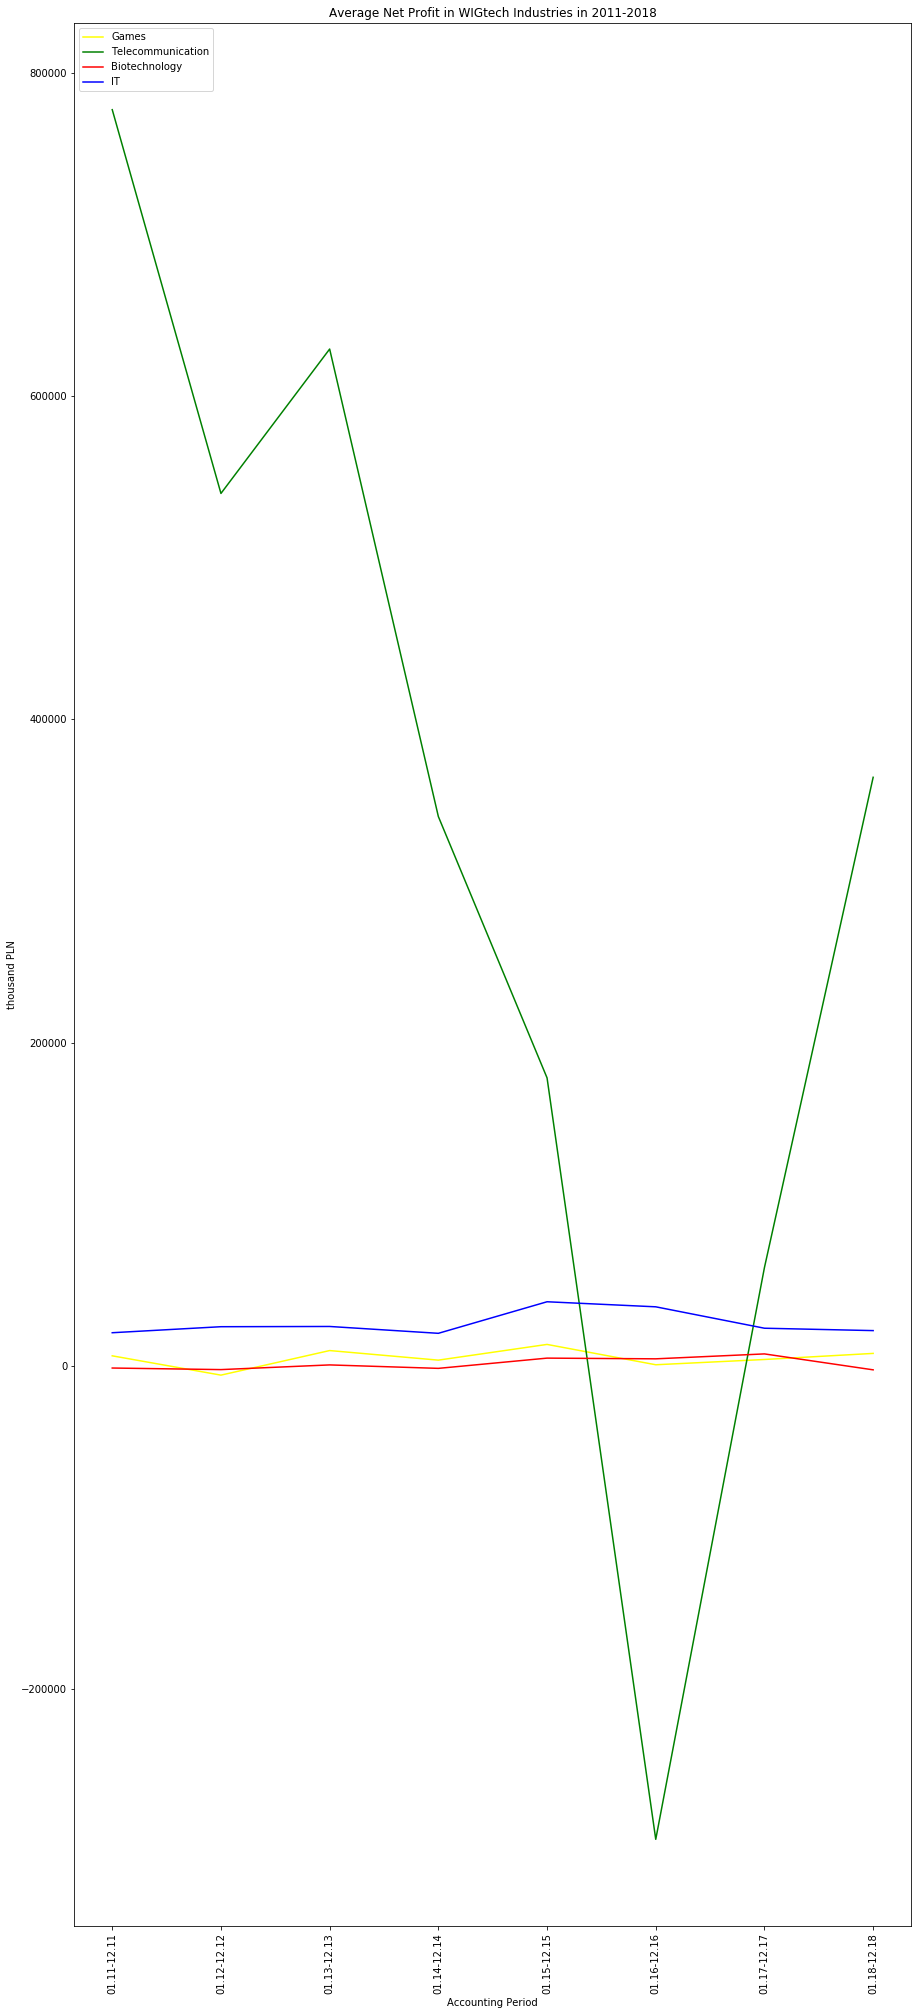

In [23]:
# Plotting the average net profit for WIGtech industries
fig = plt.figure(figsize=(15,35))
time = ['01.11-12.11','01.12-12.12','01.13-12.13','01.14-12.14','01.15-12.15','01.16-12.16','01.17-12.17','01.18-12.18']
games_netpr = [6208.00,-5738.21,9469.69,3541.12,13268.96,683.27,3946.04,7709.56]
telecom_netpr = [777365.67,539887.33,629241.33,339948.67,178220.00,-292991.75,60868.75,364225.00]
compsc_netpr = [20502.99,24226.26,24374.60,20140.23,39666.04,36538.11,23288.88,21820.00]
biotech_netpr = [-1341.90,-2312.00,584.05,-1550.36,4786.03,4351.75,7395.38,-2462.76]
plt.plot(time, games_netpr, c='yellow', label='Games')
plt.plot(time, telecom_netpr, c='green', label='Telecommunication')
plt.plot(time, biotech_netpr, c='red', label='Biotechnology')
plt.plot(time, compsc_netpr, c='blue', label='IT')
plt.xticks(rotation=90)
plt.xlabel("Accounting Period")
plt.ylabel("thousand PLN")
plt.title("Average Net Profit in WIGtech Industries in 2011-2018")
plt.legend(loc='upper left')
plt.show()

Everything we can see from the above graph right now is a huge decline in the telecommunication companies' average net profit in 2016. The telecommunication sector is without a doubt an industry of high profits and high losses and seems to be a completely other category. It is difficult to analyse and see some patterns in the case of games, computer science and biotechnology industries. Therefore, we will plot a seperate plot for these sectors.

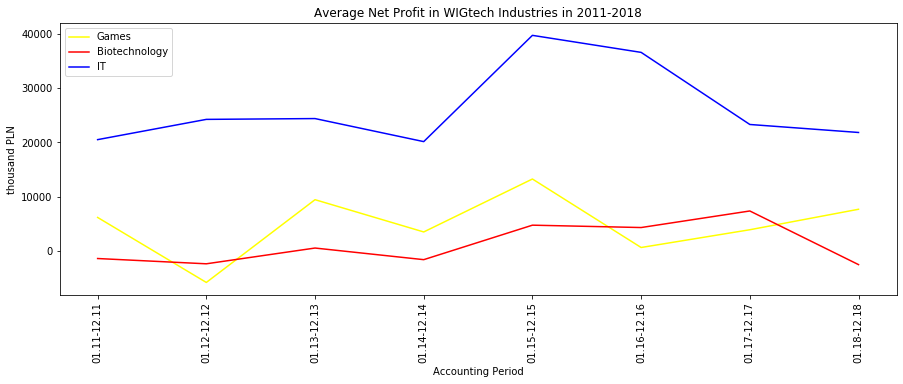

In [24]:
# Plotting the average net profit for WIGtech industries
fig = plt.figure(figsize=(15,5))
time = ['01.11-12.11','01.12-12.12','01.13-12.13','01.14-12.14','01.15-12.15','01.16-12.16','01.17-12.17','01.18-12.18']
games_netpr = [6208.00,-5738.21,9469.69,3541.12,13268.96,683.27,3946.04,7709.56]
compsc_netpr = [20502.99,24226.26,24374.60,20140.23,39666.04,36538.11,23288.88,21820.00]
biotech_netpr = [-1341.90,-2312.00,584.05,-1550.36,4786.03,4351.75,7395.38,-2462.76]
plt.plot(time, games_netpr, c='yellow', label='Games')
plt.plot(time, biotech_netpr, c='red', label='Biotechnology')
plt.plot(time, compsc_netpr, c='blue', label='IT')
plt.xticks(rotation=90)
plt.xlabel("Accounting Period")
plt.ylabel("thousand PLN")
plt.title("Average Net Profit in WIGtech Industries in 2011-2018")
plt.legend(loc='upper left')
plt.show()

Among games, biotechnology and comuter science industries, we can see that the most profitable sector is the computer science. IN general the net profit for computer science sector is steady and about 20,000 thousand PLN excluding some positive rise in 2015-2016. 

The biotechnology industry could be assessed positively for constant growth however, there can be noticed some difficulties, especially the fall in 2018. The games industry can be described similarly. There are beeter and worse times. 

## The Average Net Cash Flow by Industry

In [20]:
# Grouping the net cash flow results by industry
net_cash = wigtech[wigtech['financialInformation'] == 'Net cash flow']
grouped = net_cash.groupby('industry')
games = grouped.get_group('games')
games_net_cash_flow = games[['01.18-12.18','01.17-12.17','01.16-12.16','01.15-12.15','01.14-12.14','01.13-12.13','01.12-12.12','01.11-12.11']].astype(float).round(2)
games_describe = games_net_cash_flow.describe().round(2)
games_describe

,01.18-12.18,01.17-12.17,01.16-12.16,01.15-12.15,01.14-12.14,01.13-12.13,01.12-12.12,01.11-12.11
count,6.00,6.00,5.00,4.00,3.00,3.00,3.00,3.00
mean,3719.84,915.69,6745.40,7869.74,1130.13,-1340.93,861.26,33.97
std,15241.04,3835.52,11212.27,5491.45,2800.92,2718.91,1138.21,577.41
min,-6376.79,-5596.00,-4612.29,2867.00,-1698.00,-4480.00,75.28,-579.00
25%,-3688.74,-475.23,68.89,4259.75,-256.32,-2148.93,208.64,-232.86
50%,-1194.00,1776.65,6183.38,6662.69,1185.36,182.15,342.00,113.28
75%,655.25,2970.67,7210.00,10272.68,2544.20,228.61,1254.25,340.45
max,34332.50,5394.00,24877.00,15286.60,3903.03,275.07,2166.50,567.62


In games industry only in 2018 50% or less net cash flows were negative (the situation looks slightly better comparing to average WIGtech results. We will continue the analysis later - we will plot a multiple line chart to demonstrate the average net cash flow in various WIGtech industries.

In [21]:
# Grouping the net cash flow results by industry
telecommunication = grouped.get_group('telecommunication')
telecom_net_cash_flow = telecommunication[['01.18-12.18','01.17-12.17','01.16-12.16','01.15-12.15','01.14-12.14','01.13-12.13','01.12-12.12','01.11-12.11']].astype(float).round(2)
telecom_describe = telecom_net_cash_flow.describe().round(2)
telecom_describe

,01.18-12.18,01.17-12.17,01.16-12.16,01.15-12.15,01.14-12.14,01.13-12.13,01.12-12.12,01.11-12.11
count,4.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00
mean,69384.75,27682.75,10383.75,724.25,55633.33,-55218.00,-784483.67,59921.00
std,117385.07,243634.90,91867.90,105436.16,82818.86,92754.15,1361756.27,231535.68
min,-30000.00,-249000.00,-65000.00,-134271.00,-12800.00,-157000.00,-2356000.00,-126779.00
25%,-12987.75,-57879.75,-42738.50,-32766.75,9600.00,-95100.00,-1200452.00,-69618.50
50%,39569.50,7365.50,-17932.50,7034.00,32000.00,-33200.00,-44904.00,-12458.00
75%,121942.00,92928.00,35189.75,40525.00,89850.00,-4327.00,1274.50,153271.00
max,228400.00,345000.00,142400.00,123100.00,147700.00,24546.00,47453.00,319000.00


The net cash flow in telecommunication industry is 69,384.75 and is much higher from the average WIGtech (9,633.74). 

In [27]:
# Grouping the net cash flow results by industry
computer_science = grouped.get_group('IT')
comsc_net_cash_flow = computer_science[['01.18-12.18','01.17-12.17','01.16-12.16','01.15-12.15','01.14-12.14','01.13-12.13','01.12-12.12','01.11-12.11']].astype(float).round(2)
compsc_describe = comsc_net_cash_flow.describe().round(2)
compsc_describe

,01.18-12.18,01.17-12.17,01.16-12.16,01.15-12.15,01.14-12.14,01.13-12.13,01.12-12.12,01.11-12.11
count,22.00,22.00,21.00,21.00,21.00,20.00,20.00,22.00
mean,-2658.86,3649.26,-48.56,17752.16,1834.98,-9119.68,2025.46,1647.55
std,18344.16,75741.71,26323.38,70513.08,12063.63,42029.26,13401.84,28801.31
min,-63725.00,-162049.00,-38504.00,-43400.00,-21100.00,-182800.00,-37331.00,-46111.00
25%,-2991.75,-8975.50,-11847.99,-5728.00,-2435.00,-5494.00,-253.75,-6777.25
50%,-887.00,-674.50,-409.71,2005.87,-40.00,-77.42,1223.62,-24.84
75%,1586.59,1354.25,2248.00,19645.19,2738.00,2329.75,5503.75,3070.00
max,22650.00,288400.00,96334.00,313275.00,44541.00,27911.00,31232.00,116000.00


Cumputer science industry is characterised by a fluctuating average net cash flow. We can see that once it is negative (01.13-12.13 -9,119.68 thousand PLN) than it keeps increasing in periods '01.14-12.14' and '01.15-12.15' to again fall negative in '01.16-12.16'. Later in '01.17-12.17' it was positive to become negative again in '01.18-12.18'. Therefore, we can describe the net cash flow in computer science industry as unstable.

In [ ]:
# Grouping the net cash flow results by industry
biotechnology = grouped.get_group('biotechnology')
biotech_net_cash_flow = biotechnology[['01.18-12.18','01.17-12.17','01.16-12.16','01.15-12.15','01.14-12.14','01.13-12.13','01.12-12.12','01.11-12.11']].astype(float).round(2)
biotech_describe = biotech_net_cash_flow.describe().round(2)
biotech_describe

The biotechnology group is very small. It consist of just four companies. The average net cash flow seems a bit unstable, however the increasing amounts from periods '01.17-12.17' and '01.18-12.18' have to be assessed positively. What is interesting, in this industry, the percentiles in the last two periods look favorable.

In [ ]:
# Grouping the net cash flow results by industry
newtech = grouped.get_group('new technologies')
newtech_net_cash_flow = newtech[['01.18-12.18','01.17-12.17','01.16-12.16','01.15-12.15','01.14-12.14','01.13-12.13','01.12-12.12','01.11-12.11']].astype(float).round(2)
newtech_describe = newtech_net_cash_flow.describe().round(2)
newtech_describe

The new technologies group is the smallest one in our dataset. It comprises only two companies and we have data only for one of them. It is quite a specific group, very small though, so we will skip it in further analysis.

## Visualising the Average Net Cash Flow

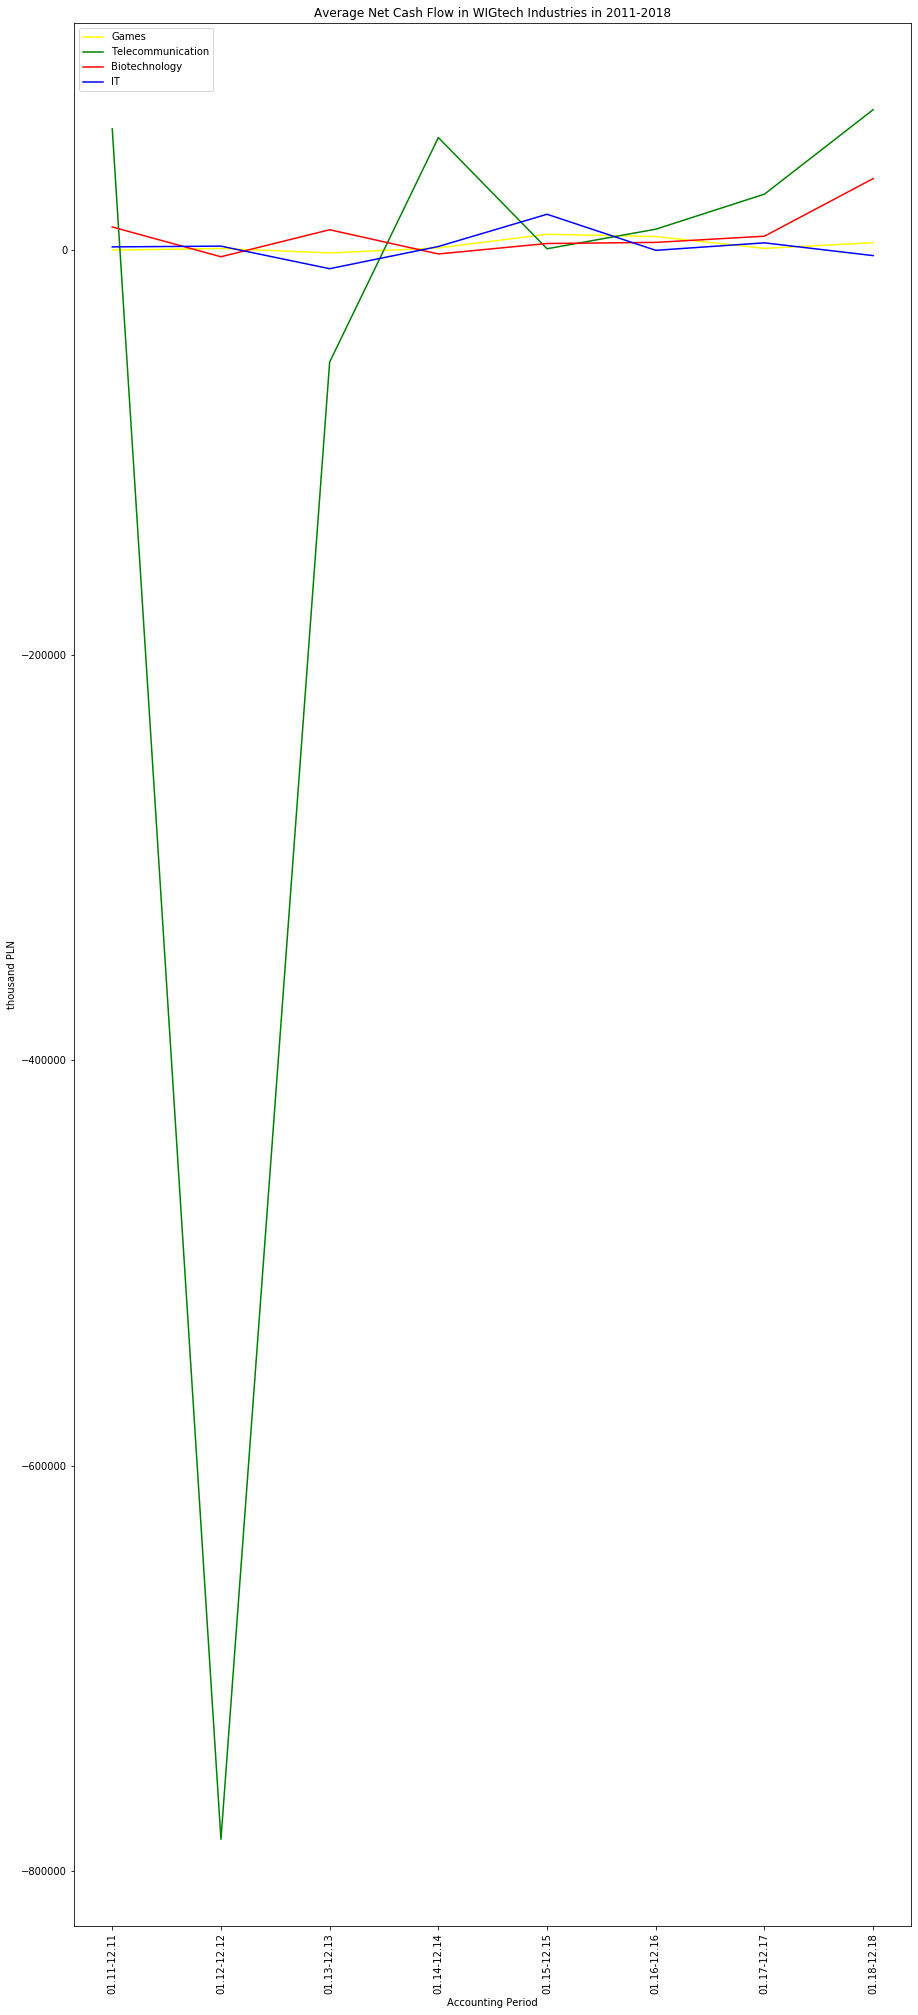

In [25]:
# Plotting the average net cash flow for WIGtech industries
fig = plt.figure(figsize=(15,35))
time = ['01.11-12.11','01.12-12.12','01.13-12.13','01.14-12.14','01.15-12.15','01.16-12.16','01.17-12.17','01.18-12.18']
games = [33.97, 861.26, -1340.93,1130.13,7869.74,6745.40,915.69,3719.84]
telecom = [59921.00,-784483.67,-55218.00,55633.33,724.25,10383.75,27682.75,69384.75]
compsc = [1647.55, 2025.46, -9119.68, 1834.98, 17752.16, -48.56, 3649.26, -2658.86]
biotech = [11485.84,-3220.86,10117.32,-1835.88, 3315.11,3871.54,6926.07,35368.19]
plt.plot(time, games, c='yellow', label='Games')
plt.plot(time, telecom, c='green', label='Telecommunication')
plt.plot(time, biotech, c='red', label='Biotechnology')
plt.plot(time, compsc, c='blue', label='IT')
plt.xticks(rotation=90)
plt.xlabel("Accounting Period")
plt.ylabel("thousand PLN")
plt.title("Average Net Cash Flow in WIGtech Industries in 2011-2018")
plt.legend(loc='upper left')
plt.show()

We can notice that telecommunication companies average net cash flow plummet drastically in 2012. The situation gets better in futher accounting periods. The situation was still undulated until 2015 - after this time the net cash flow increases year by year steadily. A huge drop in the average net cash flow in WIGtech telecommunication industry in 2012 causes, that is can be difficult to notice any other changes. We will create another graph for period 2011-2018, however we will exclude telecommunication industry. 

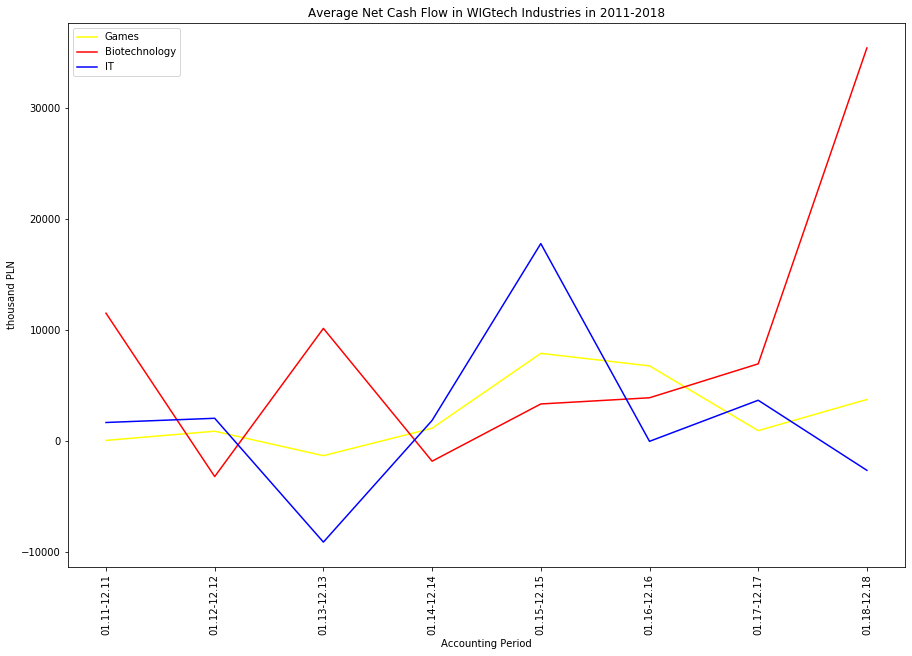

In [26]:
# Plotting the average net cash flow for WIGtech industries
fig = plt.figure(figsize=(15,10))
time = ['01.11-12.11','01.12-12.12','01.13-12.13','01.14-12.14','01.15-12.15','01.16-12.16','01.17-12.17','01.18-12.18']
games = [33.97, 861.26, -1340.93,1130.13,7869.74,6745.40,915.69,3719.84]
compsc = [1647.55, 2025.46, -9119.68, 1834.98, 17752.16, -48.56, 3649.26, -2658.86]
biotech = [11485.84,-3220.86,10117.32,-1835.88, 3315.11,3871.54,6926.07,35368.19]
plt.plot(time, games, c='yellow', label='Games')
plt.plot(time, biotech, c='red', label='Biotechnology')
plt.plot(time, compsc, c='blue', label='IT')
plt.xticks(rotation=90)
plt.xlabel("Accounting Period")
plt.ylabel("thousand PLN")
plt.title("Average Net Cash Flow in WIGtech Industries in 2011-2018")
plt.legend(loc='upper left')
plt.show()

If we look at this graph on Average Net Cash Flow in WIGtech Industries in 2011-2018 excluding telecommunications you can see that there are differences among various WIGtech sectors. For example looking at accounting period 01.13-12.13 we can notice that in computer science and games industry, the net cash flow was negative, while in biotechnology opposite. Also a huge surge in 01.18-12.18 in biotechnology was a decline in computer science industry.   

# Conclusion
---


To summarise, the main idea of the project was to find some interesting patterns in data coming from financial statements of WIGtech companies. The project could never end if I tried to analyse all the available information. I decided to choose net profit and net cash flow because these categories are special in terms of investment and provide a nice overall idea of the companies. 

While working on the project it turned out that the variation among companies' results was very large. Therefore the companies were divided into groups based on the industry they represent. 

The telecommunication companies were the ones of very high profits and losses in comparison to other WIGtech companies. We noticed a huge drop in 2012 net cash flow in the telecommunication industry. Interestingly, that time the net profit was very large. That is why it always makes sense to not only rely on the net profit, which based on the above-mentioned accrual accounting rule may provide misleading information.

Among games, biotechnology and comuter science industries, we noticed that the most profitable sector was computer science/IT. In general, the net profit for computer science sector was steady and about 20,000 thousand PLN excluding some positive rise in 2015-2016. In the case of net cash flow, we noticed fluctuations from year to year.
